In [181]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [182]:
train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_train_features.npy')
train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_train_labels.npy')
train_features = np.squeeze(train_features)
print("train_features.shape:",train_features.shape)
print("train_labels.shape", train_labels.shape)

test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_test_features.npy')
test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\um_test_labels.npy')
test_features = np.squeeze(test_features)
print("test_features.shape:",test_features.shape)
print("test_labels.shape", test_labels.shape)

train_features.shape: (25456, 84)
train_labels.shape (25456, 1)
test_features.shape: (5920, 84)
test_labels.shape (5920, 1)


In [183]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(train_features, train_labels)
classifier.score(test_features,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7923986486486486

In [184]:
#使用pca降维
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca_train = pca.fit_transform(train_features)
pca_test = pca.fit_transform(test_features)
print("new_train.shape:", pca_train.shape)
print("new_test.shape:", pca_test.shape)

new_train.shape: (25456, 20)
new_test.shape: (5920, 20)


In [185]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(pca_train, train_labels)
classifier.score(pca_test,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7886824324324324

In [186]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso           # 此处以L1正则化的线性模型Lasso为例
lasso = Lasso(alpha=0.0005).fit(train_features, train_labels) 
model = SelectFromModel(lasso, prefit=True)

train_new = model.transform(train_features)
test_new = model.transform(test_features)

print("train_new.shape:", train_new.shape)
print("test_new.shape:", test_new.shape)

train_new.shape: (25456, 12)
test_new.shape: (5920, 12)


D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.87646484375, tolerance: 0.6363999843597412
  positive)


In [187]:
from sklearn import svm
classifier = svm.SVC()
classifier.fit(train_new, train_labels)
classifier.score(test_new,test_labels)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.79375

In [163]:
addfeatures_train = []
addfeatures_test = []

for i in range(86):
    min_train = train_features[i*296:(i+1)*296]
    addfeatures_train.append(min_train)
    
for i in range(20):
    min_test = test_features[i*296:(i+1)*296]
    addfeatures_test.append(min_test)
    
addfeatures_train = np.squeeze(np.array(addfeatures_train))
#addfeatures_train = addfeatures_train.transpose(0,2,1)
addfeatures_test = np.squeeze(np.array(addfeatures_test))
#addfeatures_test = addfeatures_test.transpose(0,2,1)
    
addtrain_labels = np.array([0]*43+[1]*43)
addtest_labels = np.array([0]*10+[1]*10)

In [164]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.optimizers import SGD

data_dim = 84
timesteps = 296
num_classes = 1

# 期望输入数据尺寸: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(84, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # 返回维度为 32 的向量序列
model.add(LSTM(42, return_sequences=True))  # 返回维度为 32 的向量序列
model.add(LSTM(21))  # 返回维度为 32 的单个向量
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

his = model.fit(x=addfeatures_train, y=addtrain_labels,batch_size=43, epochs=500,shuffle=True, verbose=1, 
               validation_data=(addfeatures_test,addtest_labels))



Train on 86 samples, validate on 20 samples
Epoch 1/500
86/86 [==============================] - 3s 30ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/500
86/86 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/500
86/86 [==============================] - 1s 10ms/step - loss: 0.6924 - accuracy: 0.5116 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 4/500
86/86 [==============================] - 1s 10ms/step - loss: 0.6915 - accuracy: 0.5233 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 5/500
86/86 [==============================] - 1s 10ms/step - loss: 0.6913 - accuracy: 0.5814 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 6/500
86/86 [==============================] - 1s 10ms/step - loss: 0.6921 - accuracy: 0.5465 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 7/500
86/86 [==============================] - 1s 10ms/step - loss: 0.6914 - accuracy: 0.5349 - va

86/86 [==============================] - 1s 11ms/step - loss: 0.6906 - accuracy: 0.5233 - val_loss: 0.6878 - val_accuracy: 0.5500
Epoch 59/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6890 - accuracy: 0.5116 - val_loss: 0.6875 - val_accuracy: 0.6500
Epoch 60/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6848 - accuracy: 0.6047 - val_loss: 0.6879 - val_accuracy: 0.5500
Epoch 61/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6848 - accuracy: 0.6279 - val_loss: 0.6871 - val_accuracy: 0.6500
Epoch 62/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6845 - accuracy: 0.5814 - val_loss: 0.6871 - val_accuracy: 0.7000
Epoch 63/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6945 - accuracy: 0.5116 - val_loss: 0.6868 - val_accuracy: 0.7000
Epoch 64/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6837 - accuracy: 0.6395 - val_loss: 0.6870 - val_accuracy: 0.6000
Epoch 65/500

86/86 [==============================] - 1s 11ms/step - loss: 0.6919 - accuracy: 0.5116 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 116/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6919 - accuracy: 0.5349 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 117/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6920 - accuracy: 0.5116 - val_loss: 0.6919 - val_accuracy: 0.5500
Epoch 118/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6919 - accuracy: 0.5349 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 119/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6918 - accuracy: 0.5465 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 120/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6918 - accuracy: 0.5349 - val_loss: 0.6919 - val_accuracy: 0.5500
Epoch 121/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6918 - accuracy: 0.5349 - val_loss: 0.6919 - val_accuracy: 0.5500
Epoch 

Epoch 172/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6912 - accuracy: 0.4767 - val_loss: 0.6912 - val_accuracy: 0.5500
Epoch 173/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6906 - accuracy: 0.5349 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 174/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6905 - accuracy: 0.5233 - val_loss: 0.6912 - val_accuracy: 0.5500
Epoch 175/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6904 - accuracy: 0.5465 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 176/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6912 - accuracy: 0.5000 - val_loss: 0.6912 - val_accuracy: 0.5500
Epoch 177/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6905 - accuracy: 0.5233 - val_loss: 0.6912 - val_accuracy: 0.5500
Epoch 178/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6905 - accuracy: 0.5349 - val_loss: 0.6912 - val_accuracy:

Epoch 229/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6911 - accuracy: 0.5116 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 230/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6882 - accuracy: 0.5814 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 231/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6881 - accuracy: 0.5698 - val_loss: 0.6910 - val_accuracy: 0.4500
Epoch 232/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6880 - accuracy: 0.6047 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 233/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6897 - accuracy: 0.5465 - val_loss: 0.6910 - val_accuracy: 0.5500
Epoch 234/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6900 - accuracy: 0.5116 - val_loss: 0.6910 - val_accuracy: 0.4500
Epoch 235/500
86/86 [==============================] - 1s 11ms/step - loss: 0.6878 - accuracy: 0.5930 - val_loss: 0.6910 - val_accuracy:

KeyboardInterrupt: 

In [106]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.connectome import sym_matrix_to_vec

conn_est = ConnectivityMeasure(kind = 'covariance')
addfeatures_train = conn_est.fit_transform(addfeatures_train)
addfeatures_train = sym_matrix_to_vec(addfeatures_train)

addfeatures_test = conn_est.fit_transform(addfeatures_test)
addfeatures_test = sym_matrix_to_vec(addfeatures_test)

In [107]:
addfeatures_train.shape

(86, 3570)

In [87]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.connectome import sym_matrix_to_vec

conn_est = ConnectivityMeasure(kind = 'covariance')
addfeatures_train = conn_est.fit_transform(addfeatures_train)
addfeatures_train = sym_matrix_to_vec(addfeatures_train)

addfeatures_test = conn_est.fit_transform(addfeatures_test)
addfeatures_test = sym_matrix_to_vec(addfeatures_test)

In [88]:
addfeatures_train.shape

(86, 43956)

In [62]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso           # 此处以L1正则化的线性模型Lasso为例
lasso = Lasso(alpha=0.0001).fit(addfeatures_train, addtrain_labels) 
model = SelectFromModel(lasso, prefit=True)

train_new = model.transform(addfeatures_train)
test_new = model.transform(addfeatures_test)

print("train_new.shape:", train_new.shape)
print("test_new.shape:", test_new.shape)

train_new.shape: (86, 101)
test_new.shape: (20, 101)


D:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0028285631472965292, tolerance: 0.00215
  positive)


In [63]:
from sklearn import svm
classifier = svm.SVC( )
classifier.fit(train_new, addtrain_labels)
classifier.score(test_new,addtest_labels)

0.5

In [64]:
def fisherscore(data, labels, num):

    high = len(data)  # 向量个数
    weight = len(data[0])  # 向量长度
    P_num = np.sum(labels == 0)  # 正样本
    N_num = np.sum(labels == 1)  # 负样本

    # 计算Fisher score

    fisherscore = []
    for i in range(weight):
        p = []
        n = []
        p_var = []
        n_var = []
        for j in range(high):
            if labels[j] == 0:
                p.append(data[j, i])
            if labels[j] == 1:
                n.append(data[j, i])

        p_average = np.sum(p) / len(p)
        n_average = np.sum(n) / len(n)
        average = (np.sum(p) + np.sum(n)) / (len(p) + len(n))

        for j in range(high):
            if labels[j] == 0:
                p_var.append((data[j, i] - p_average) ** 2)
            if labels[j] == 1:
                n_var.append((data[j, i] - n_average) ** 2)

        score = ((p_average - average) ** 2 + (n_average - average) ** 2) / (
                    np.sum(p_var) / len(p) + np.sum(n_var) / len(n))

        fisherscore.append(score)

    index = np.argsort(-np.array(fisherscore))  # 返回索引
    new_data = []
    for i in range(num):
        new_data.append(data[:, index[i]])

    new_data = np.array(new_data)
    new_data = new_data.transpose(1, 0)

    return new_data

In [65]:
fisher_train = fisherscore(addfeatures_train, addtrain_labels, 2)
fisher_test = fisherscore(addfeatures_test, addtest_labels, 2)

In [66]:
from sklearn import svm
classifier = svm.LinearSVC()
classifier.fit(fisher_train, addtrain_labels)
classifier.score(fisher_test,addtest_labels)

0.0

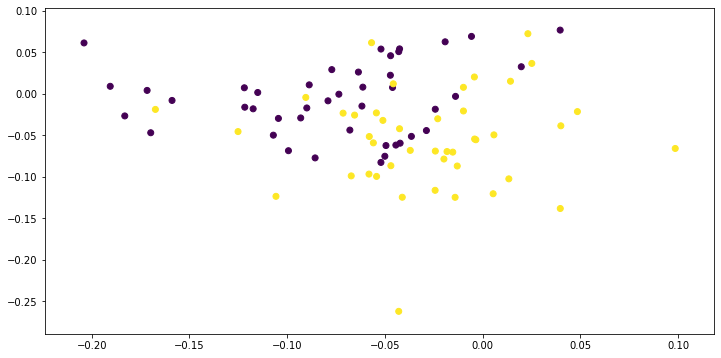

In [67]:
plt.figure(figsize=(12, 6))
plt.scatter(fisher_train[:, 0], fisher_train[:, 1], c=addtrain_labels)

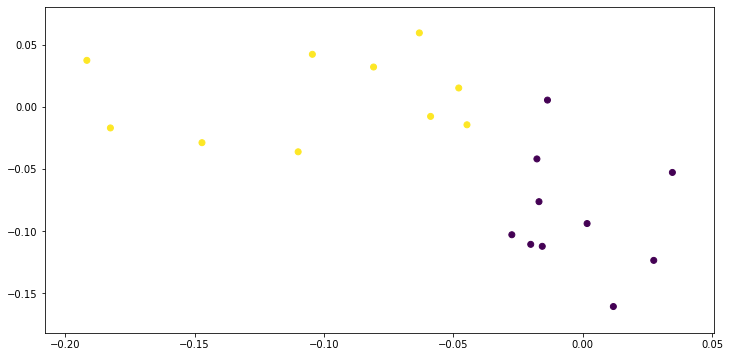

In [68]:
plt.figure(figsize=(12, 6))
plt.scatter(fisher_test[:, 0], fisher_test[:, 1], c=addtest_labels)